# Dependencies and files

## Imports

In [17]:
import scanpy as sc
import pandas as pd
import numpy as np
import gseapy
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import anndata as an

# Global variables

## Load files

### Load pseudobulks

In [18]:
adata_pb = sc.read_h5ad('../../data/hb_data/hb_pb_mean.h5ad')
adata_pb.var.index.name = 'ensembl_id'
adata_pb.var.reset_index(inplace=True)
adata_pb.var.set_index('feature_name', inplace=True)
adata_pb

AnnData object with n_obs × n_vars = 163 × 18790
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'sample_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [19]:
adata_pb.obs.cell_type.value_counts()

cell_type
astrocyte                                 20
central nervous system macrophage         20
neuron                                    20
oligodendrocyte                           20
oligodendrocyte precursor cell            20
endothelial cell                          15
fibroblast                                14
leukocyte                                 14
pericyte                                  11
vascular associated smooth muscle cell     9
Name: count, dtype: int64

In [41]:
adata_pb.obs.psbulk_n_cells = adata_pb.obs.psbulk_n_cells.astype(float)
adata_pb.obs[['cell_type', 'psbulk_n_cells']].groupby(['cell_type']).sum()

C:\Users\claptar\AppData\Local\Temp\ipykernel_21288\1095200821.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adata_pb.obs[['cell_type', 'psbulk_n_cells']].groupby(['cell_type']).sum()


,psbulk_n_cells
cell_type,
astrocyte,3067.0
central nervous system macrophage,1074.0
endothelial cell,32.0
fibroblast,52.0
leukocyte,20.0
neuron,92647.0
oligodendrocyte,3757.0
oligodendrocyte precursor cell,1704.0
pericyte,19.0


In [42]:
adata_pb = adata_pb[adata_pb.obs.psbulk_n_cells > 100]
adata_pb

View of AnnData object with n_obs × n_vars = 57 × 18790
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'sample_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [43]:
adata_pb.obs.cell_type.value_counts()

cell_type
neuron                               20
astrocyte                            13
oligodendrocyte                      12
central nervous system macrophage     6
oligodendrocyte precursor cell        6
Name: count, dtype: int64

In [44]:
adata_pb.obs.roi.value_counts()

roi
Human A24    19
Human A46    17
Human A32    13
Human A14     7
Human A23     1
Name: count, dtype: int64

In [45]:
adata_pb = adata_pb[adata_pb.obs.roi != 'Human A23']
adata_pb

View of AnnData object with n_obs × n_vars = 56 × 18790
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'sample_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    layers: 'psbulk_props'

In [46]:
expression = pd.DataFrame(adata_pb.X, index=adata_pb.obs_names, columns=adata_pb.var_names)
expression.T.to_csv('results/celltype_expression.csv')
adata_pb.obs.to_csv('results/celltype_annotation.csv')

## Load snRNA-Seq

In [47]:
adata_sc = sc.read_h5ad('../../data/hb_data/hb_concat.h5ad')
adata_sc.var.index.name = 'ensembl_id'
adata_sc.var.reset_index(inplace=True)
adata_sc.var.set_index('feature_name', inplace=True)
adata_sc

AnnData object with n_obs × n_vars = 102382 × 19346
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype'
    obsm: 'X_UMAP', 'X_tSNE'

In [28]:
adata_sc = sc.read_h5ad('../../data/hb_data/hb_concat_scaled.h5ad')
adata_sc.var.index.name = 'ensembl_id'
adata_sc.var.reset_index(inplace=True)
adata_sc.var.set_index('feature_name', inplace=True)
adata_sc

AnnData object with n_obs × n_vars = 102382 × 19346
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'fraction_mitochondrial', 'fraction_unspliced', 'cell_cycle_score', 'total_genes', 'total_UMIs', 'sample_id', 'supercluster_term', 'cluster_id', 'subcluster_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', '

# Preprocess snRNA-Seq

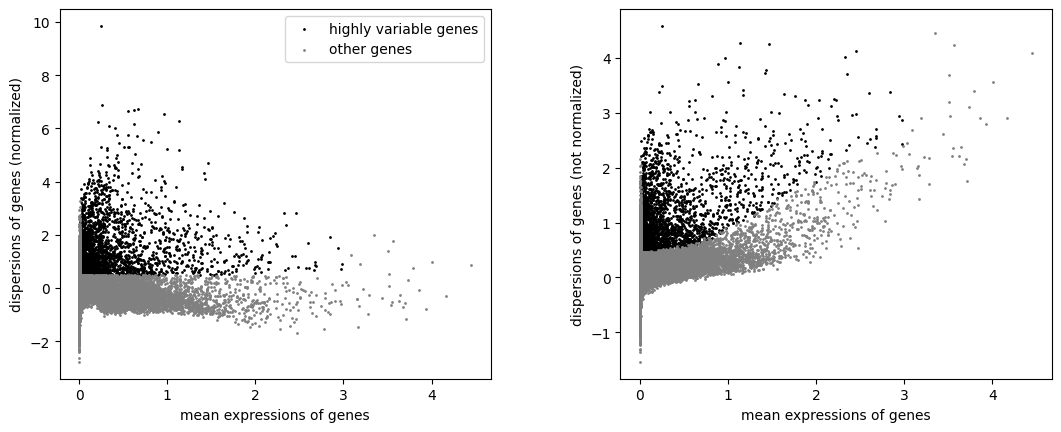

In [29]:
sc.pl.highly_variable_genes(adata_sc)

In [30]:
sc.tl.pca(adata_sc)
sc.pp.neighbors(adata_sc)
sc.tl.umap(adata_sc)

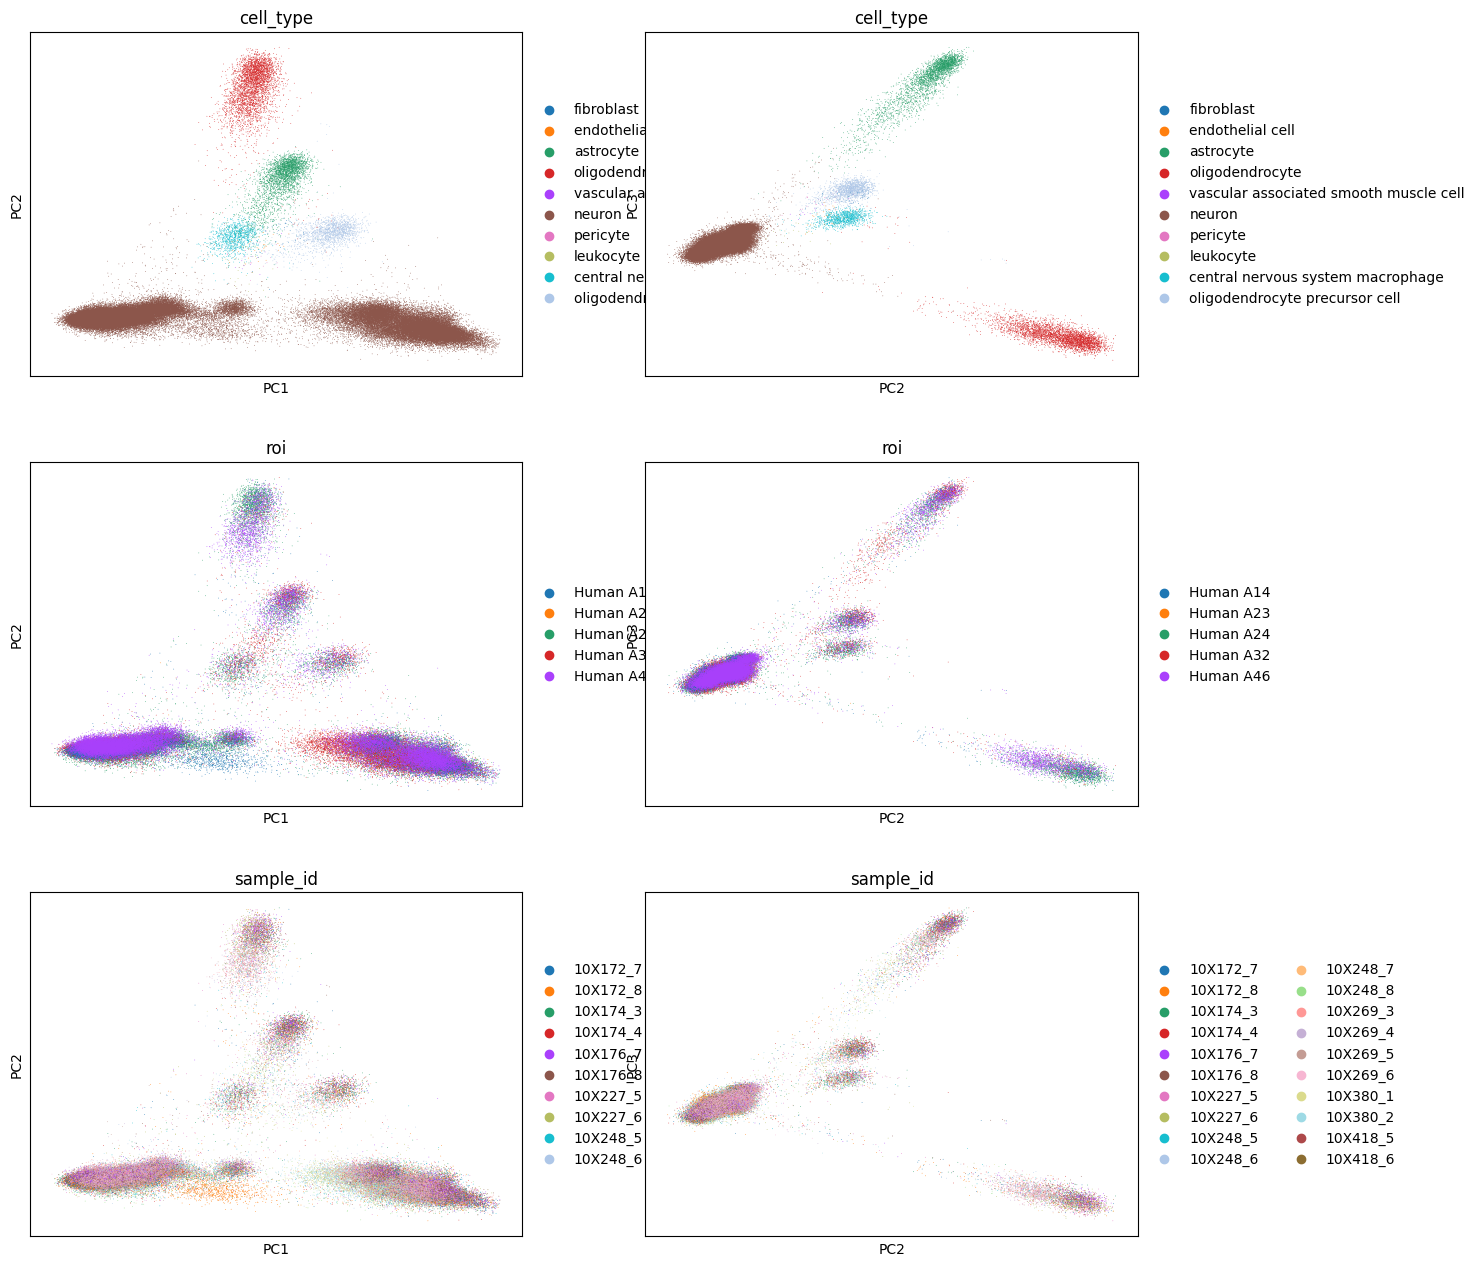

In [31]:
sc.pl.pca(adata_sc, color=['cell_type', 'roi', 'sample_id'], components=['1,2', '2,3'], ncols=2)

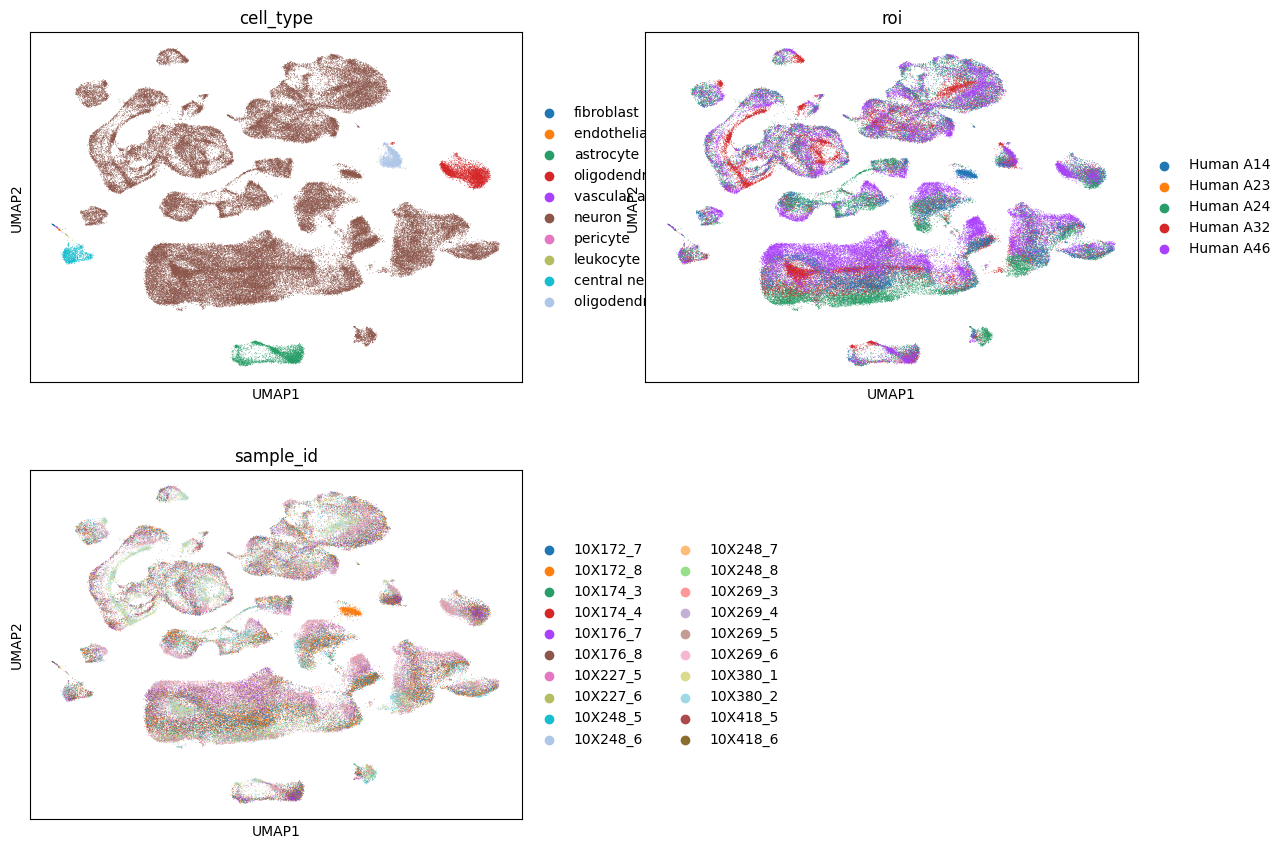

In [32]:
sc.pl.umap(adata_sc, color=['cell_type', 'roi', 'sample_id'], ncols=2)

In [33]:
adata_sc.write_h5ad("results/hb_umap.h5ad")

# Preprocess

## Filter

In [48]:
sc.pp.filter_genes(adata_pb, min_counts=5)
sc.pp.filter_genes(adata_pb, min_cells=10)

c:\projects\spatialMPFC\venv\Lib\site-packages\scanpy\preprocessing\_simple.py:273: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["n_counts"] = number


In [49]:
adata_pb

AnnData object with n_obs × n_vars = 56 × 10860
    obs: 'roi', 'organism_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'assay_ontology_term_id', 'sex_ontology_term_id', 'development_stage_ontology_term_id', 'donor_id', 'suspension_type', 'dissection', 'sample_id', 'cell_type_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'psbulk_n_cells', 'psbulk_counts'
    var: 'ensembl_id', 'Biotype', 'Chromosome', 'End', 'Gene', 'Start', 'feature_is_filtered', 'feature_reference', 'feature_biotype', 'feature_length', 'start_position', 'end_position', 'chromosome_name', 'gene_biotype', 'n_counts', 'n_cells'
    layers: 'psbulk_props'

## Normalize

In [50]:
sc.pp.normalize_total(adata_pb, target_sum=1e4)
sc.pp.log1p(adata_pb)

Highly variable genes: 3201


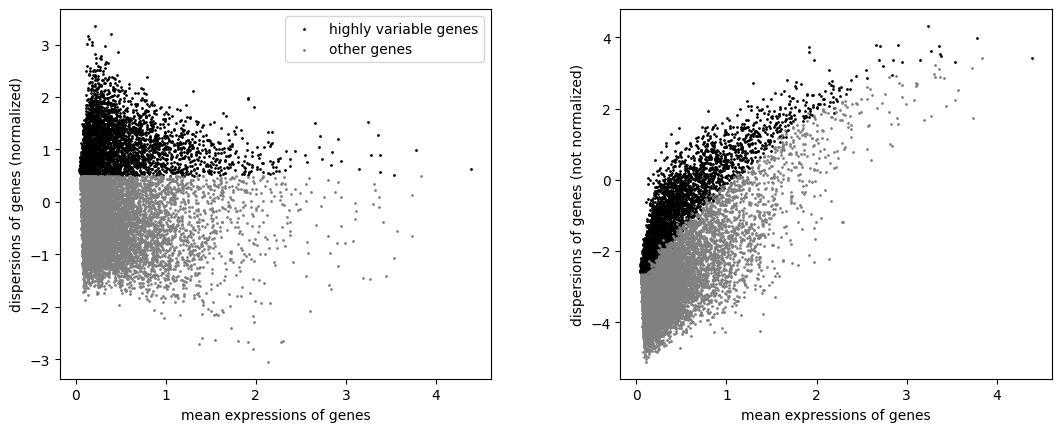

In [51]:
sc.pp.highly_variable_genes(adata_pb, batch_key='roi', max_mean=5)
print("Highly variable genes: %d"%sum(adata_pb.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata_pb)

## Visualize

In [52]:
sc.tl.pca(adata_pb)

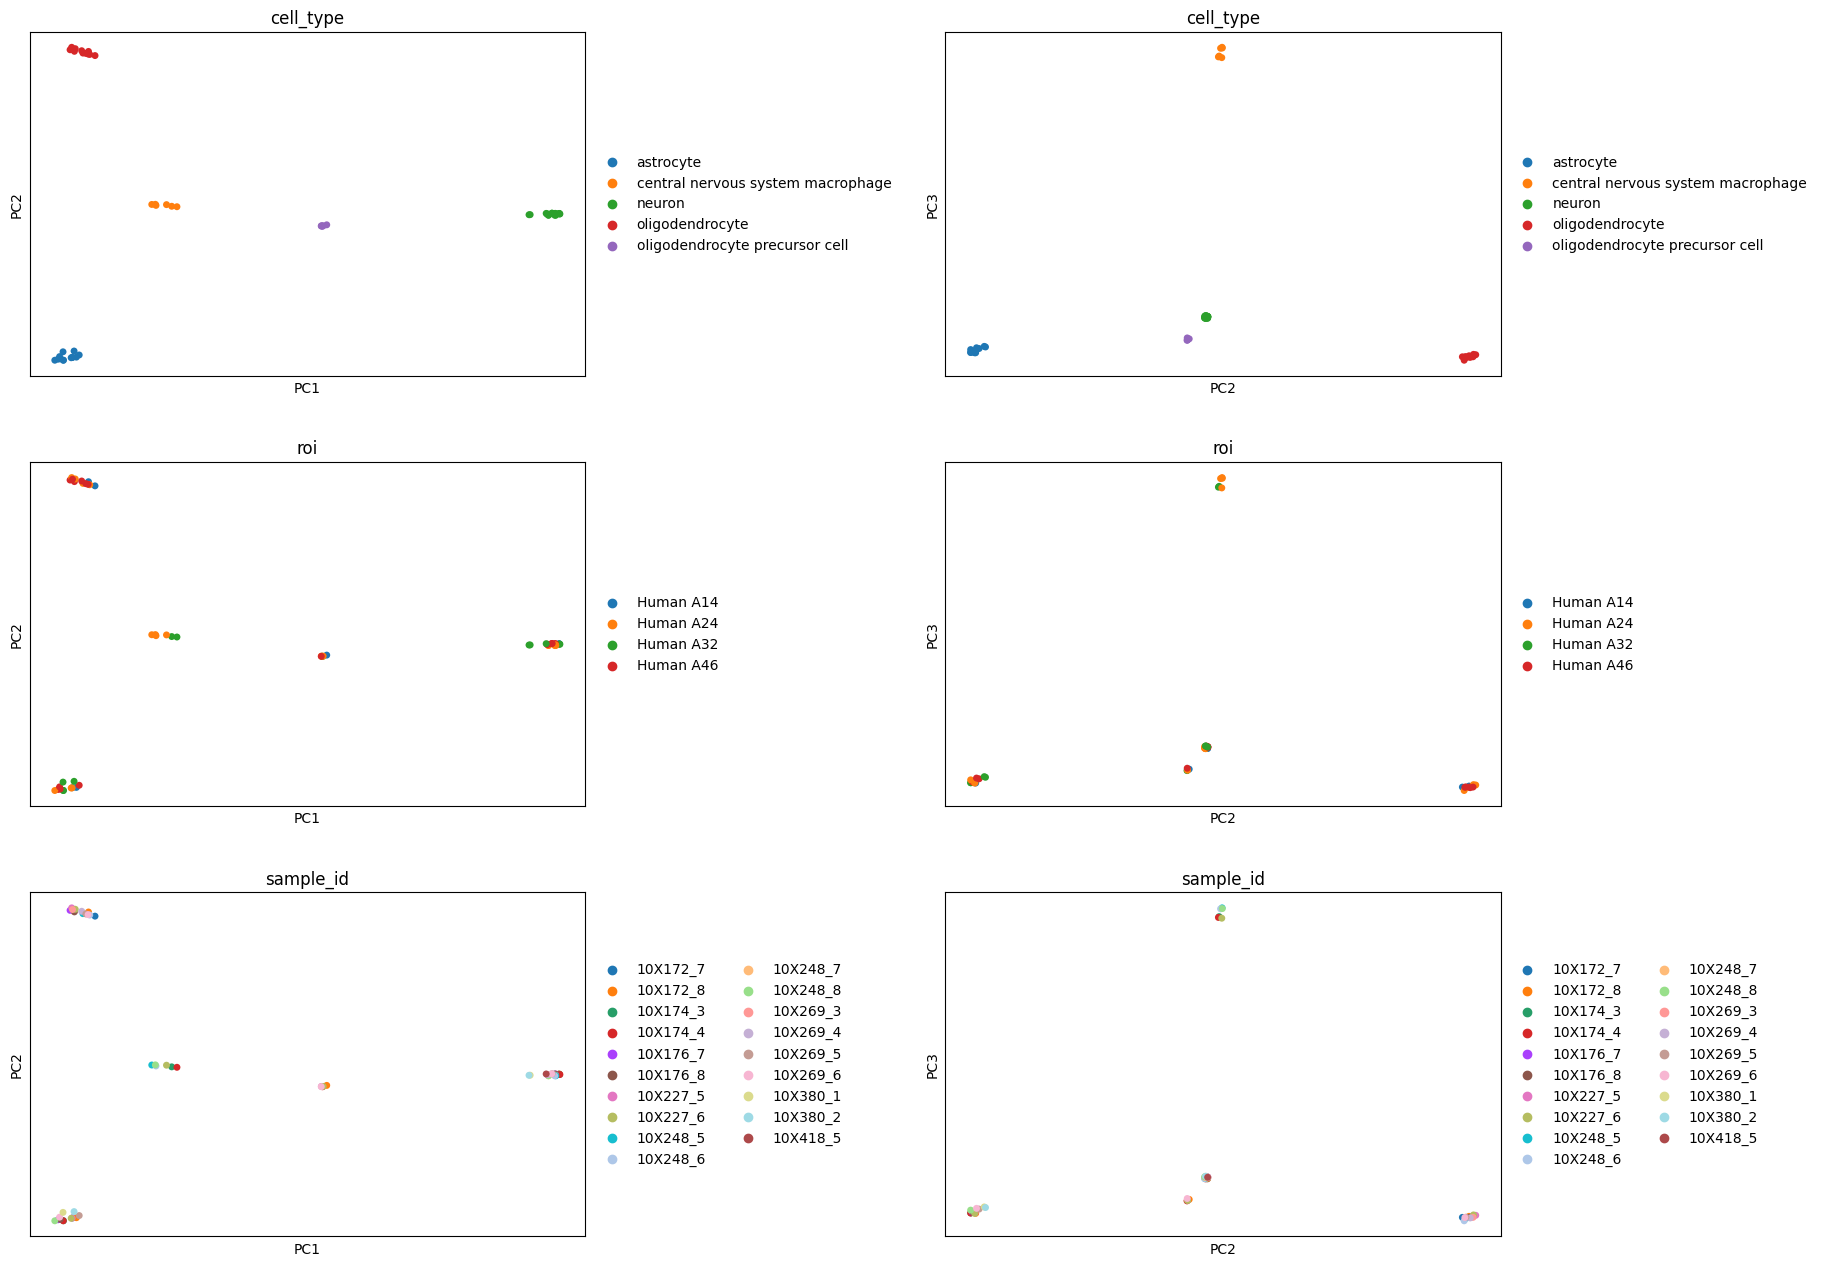

In [53]:
sc.pl.pca(adata_pb, color=['cell_type', 'roi', 'sample_id'], size=100, components=['1,2', '2,3'], ncols=2, wspace=0.5)

In [54]:
sc.pp.neighbors(adata_pb)
sc.tl.umap(adata_pb)

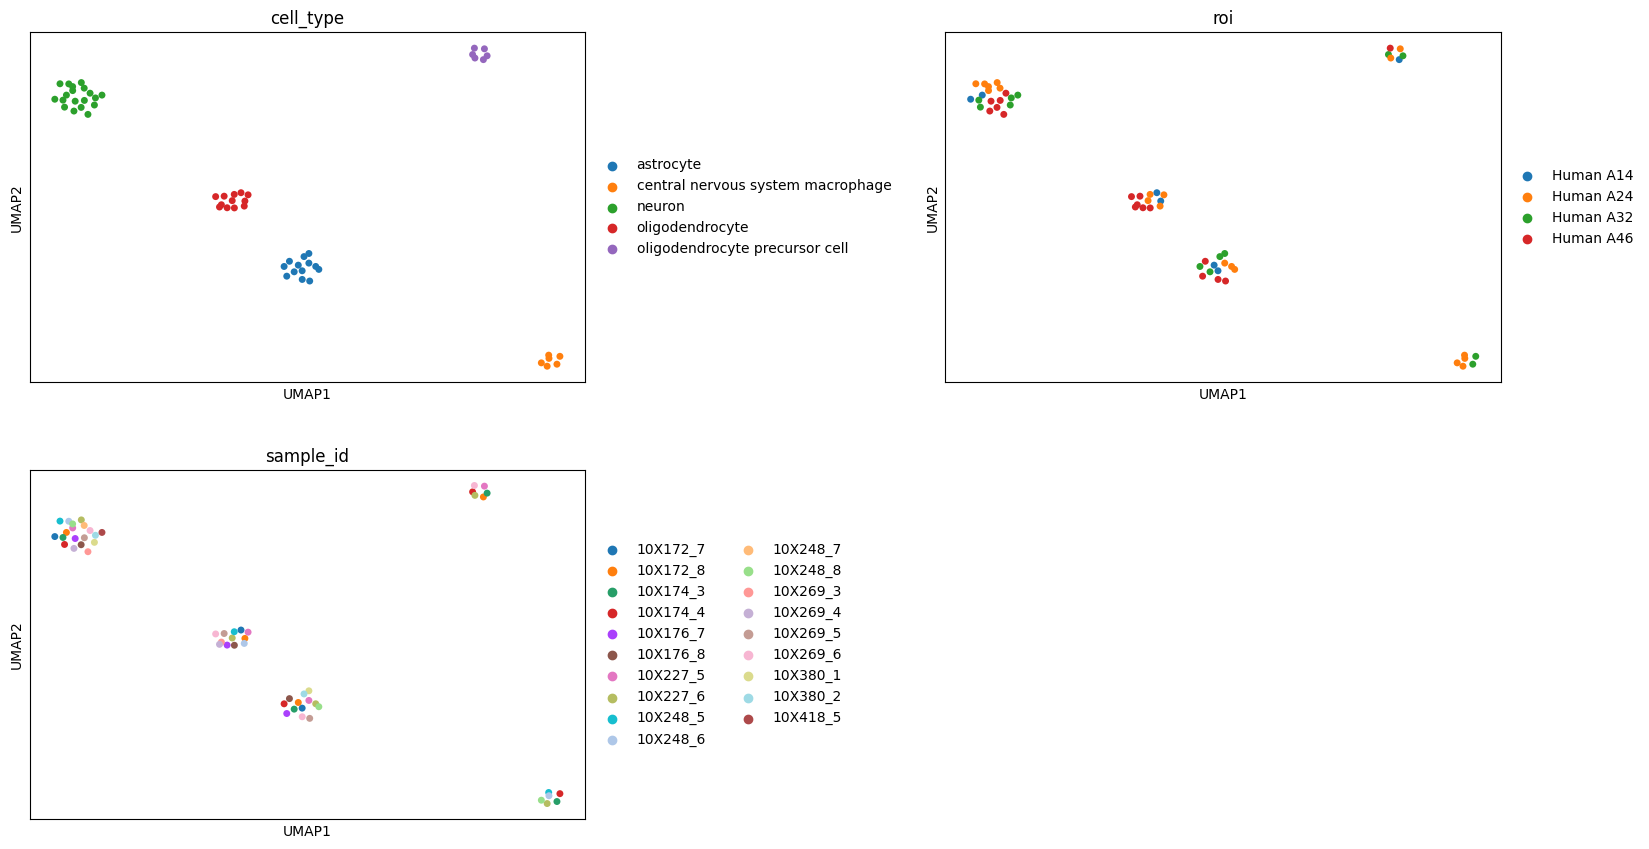

In [55]:
sc.pl.umap(adata_pb, color=['cell_type', 'roi', 'sample_id'], size=100, ncols=2, wspace=0.5)

# Rank genes

## T-test

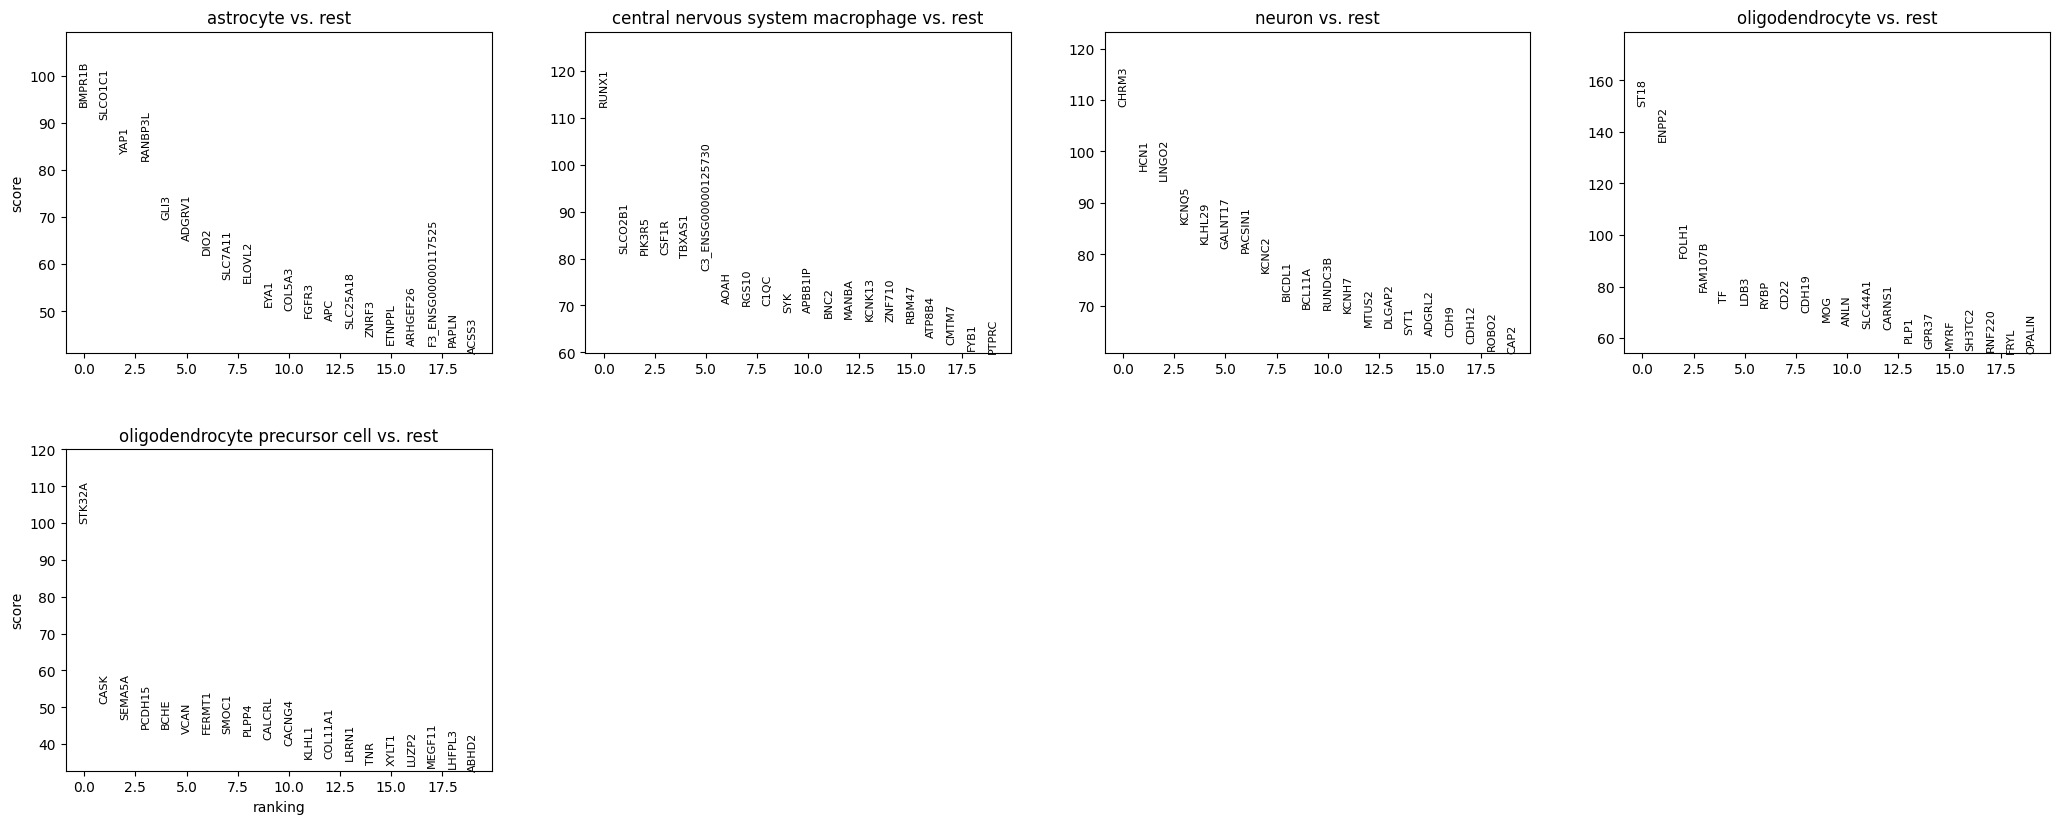

In [56]:
sc.tl.rank_genes_groups(adata_pb, 'cell_type', method='t-test', reference='rest', key_added="t-test", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="t-test")

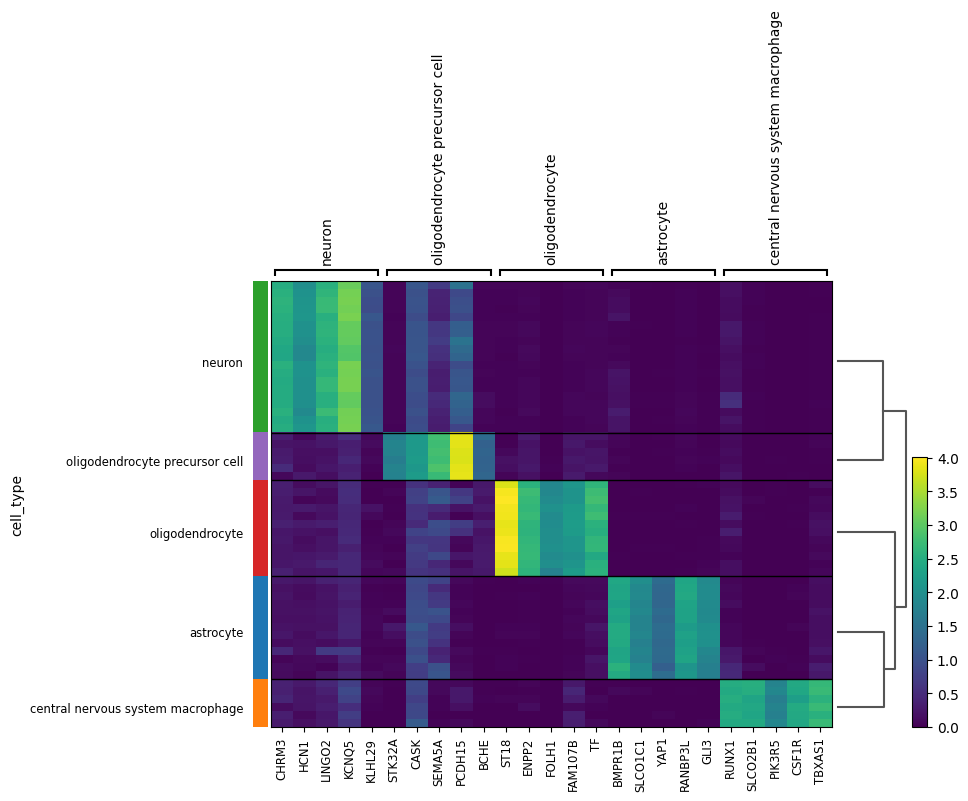

In [57]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="t-test", groupby="cell_type", show_gene_labels=True)

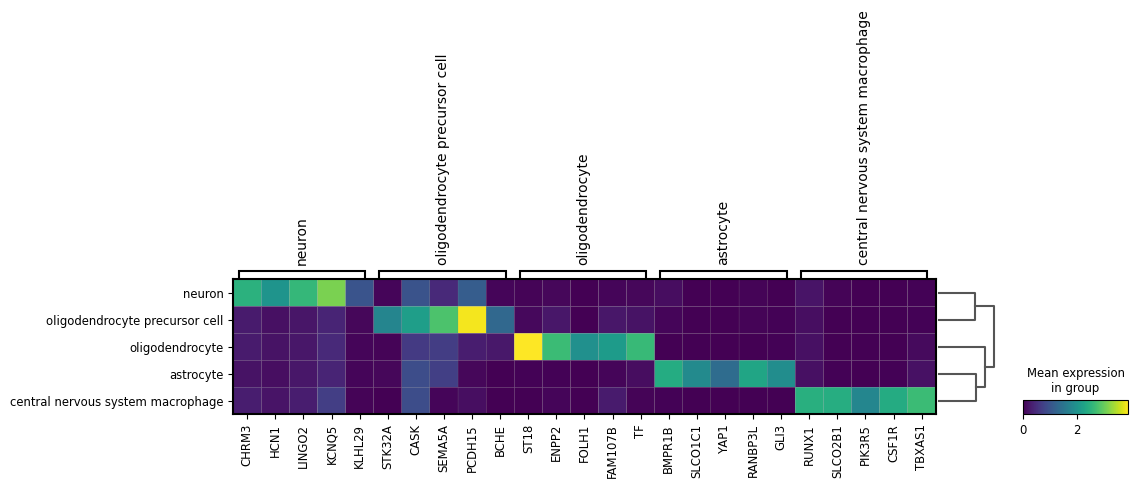

In [58]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="cell_type")

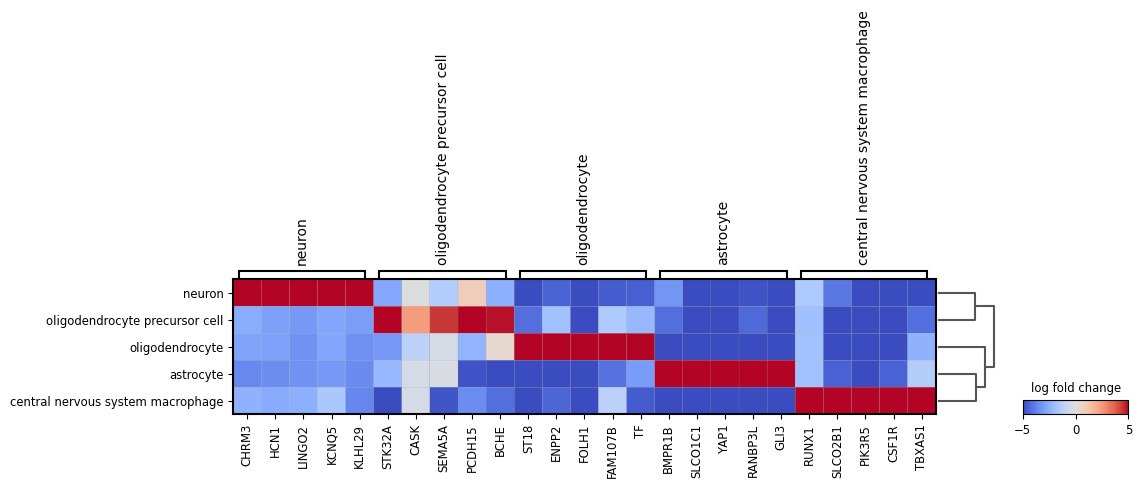

In [59]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="t-test", groupby="cell_type", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Wilcoxon

c:\projects\spatialMPFC\venv\Lib\site-packages\scanpy\plotting\_tools\__init__.py:432: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  ax.set_ylim(ymin, ymax)


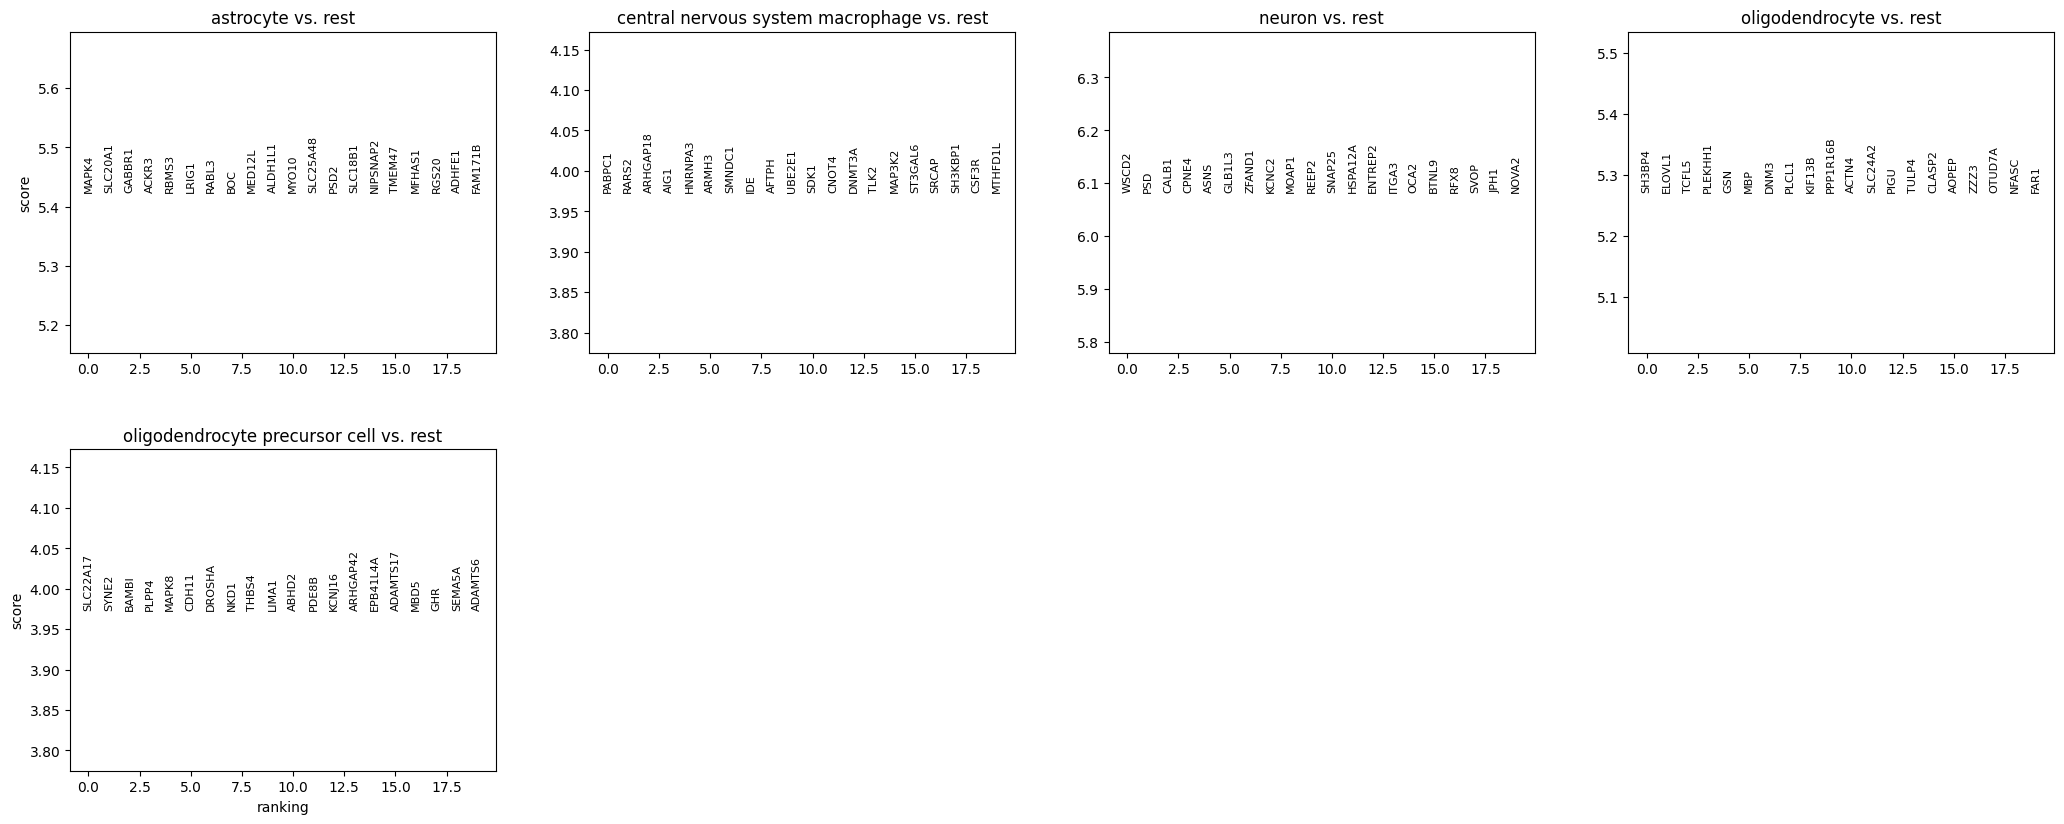

In [60]:
sc.tl.rank_genes_groups(adata_pb, 'cell_type', method='wilcoxon', reference='rest', key_added="wilcoxon", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="wilcoxon")

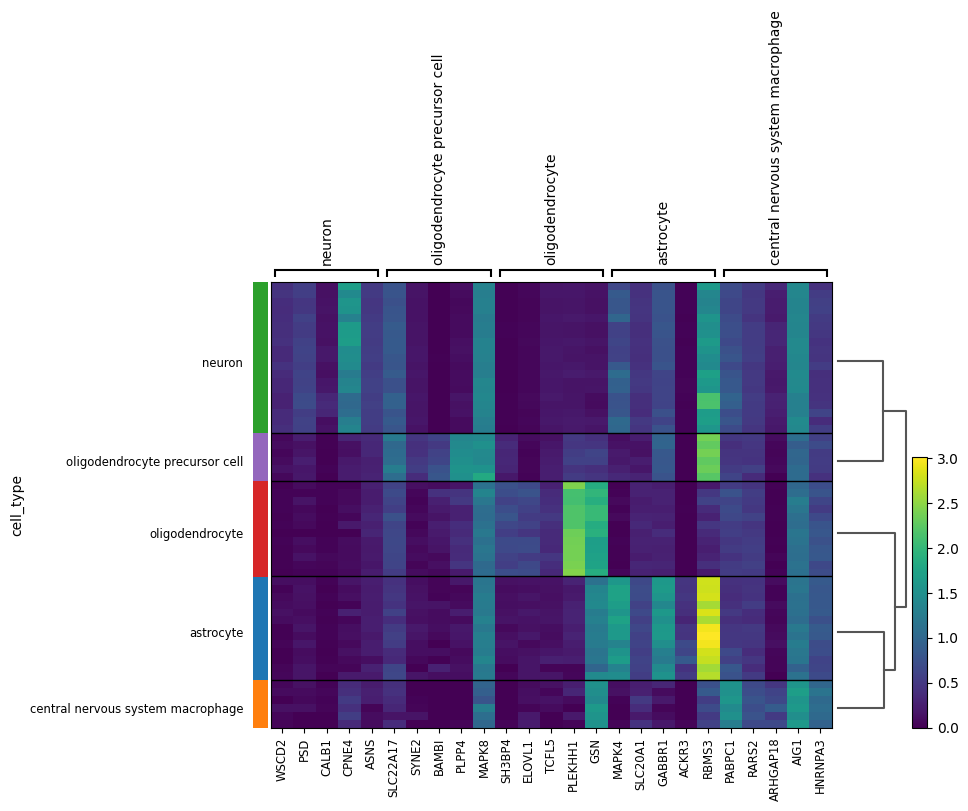

In [61]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="wilcoxon", groupby="cell_type", show_gene_labels=True)

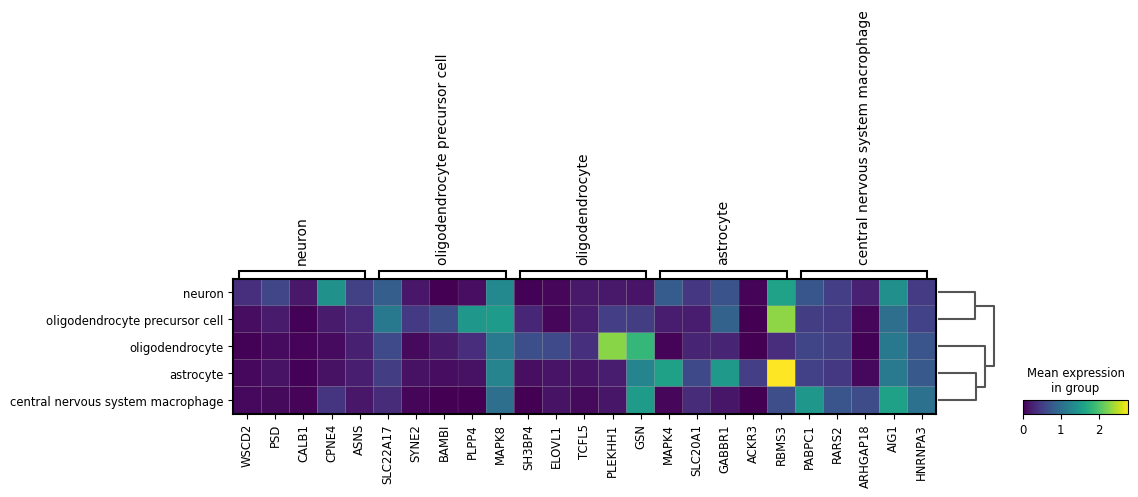

In [62]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="cell_type")

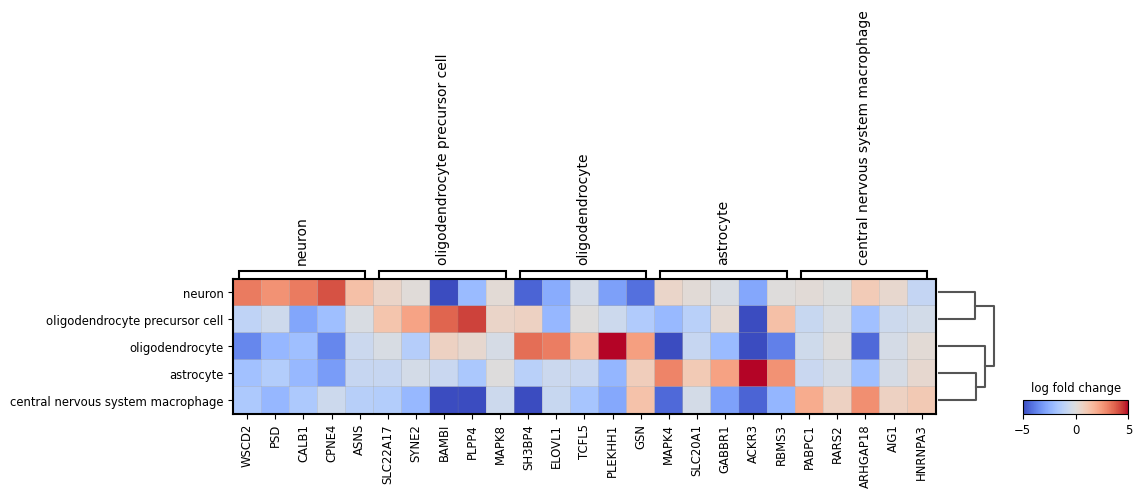

In [63]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="wilcoxon", groupby="cell_type", vcenter=0, vmax=5, vmin=-5, values_to_plot='logfoldchanges', cmap='coolwarm')

## Logreg

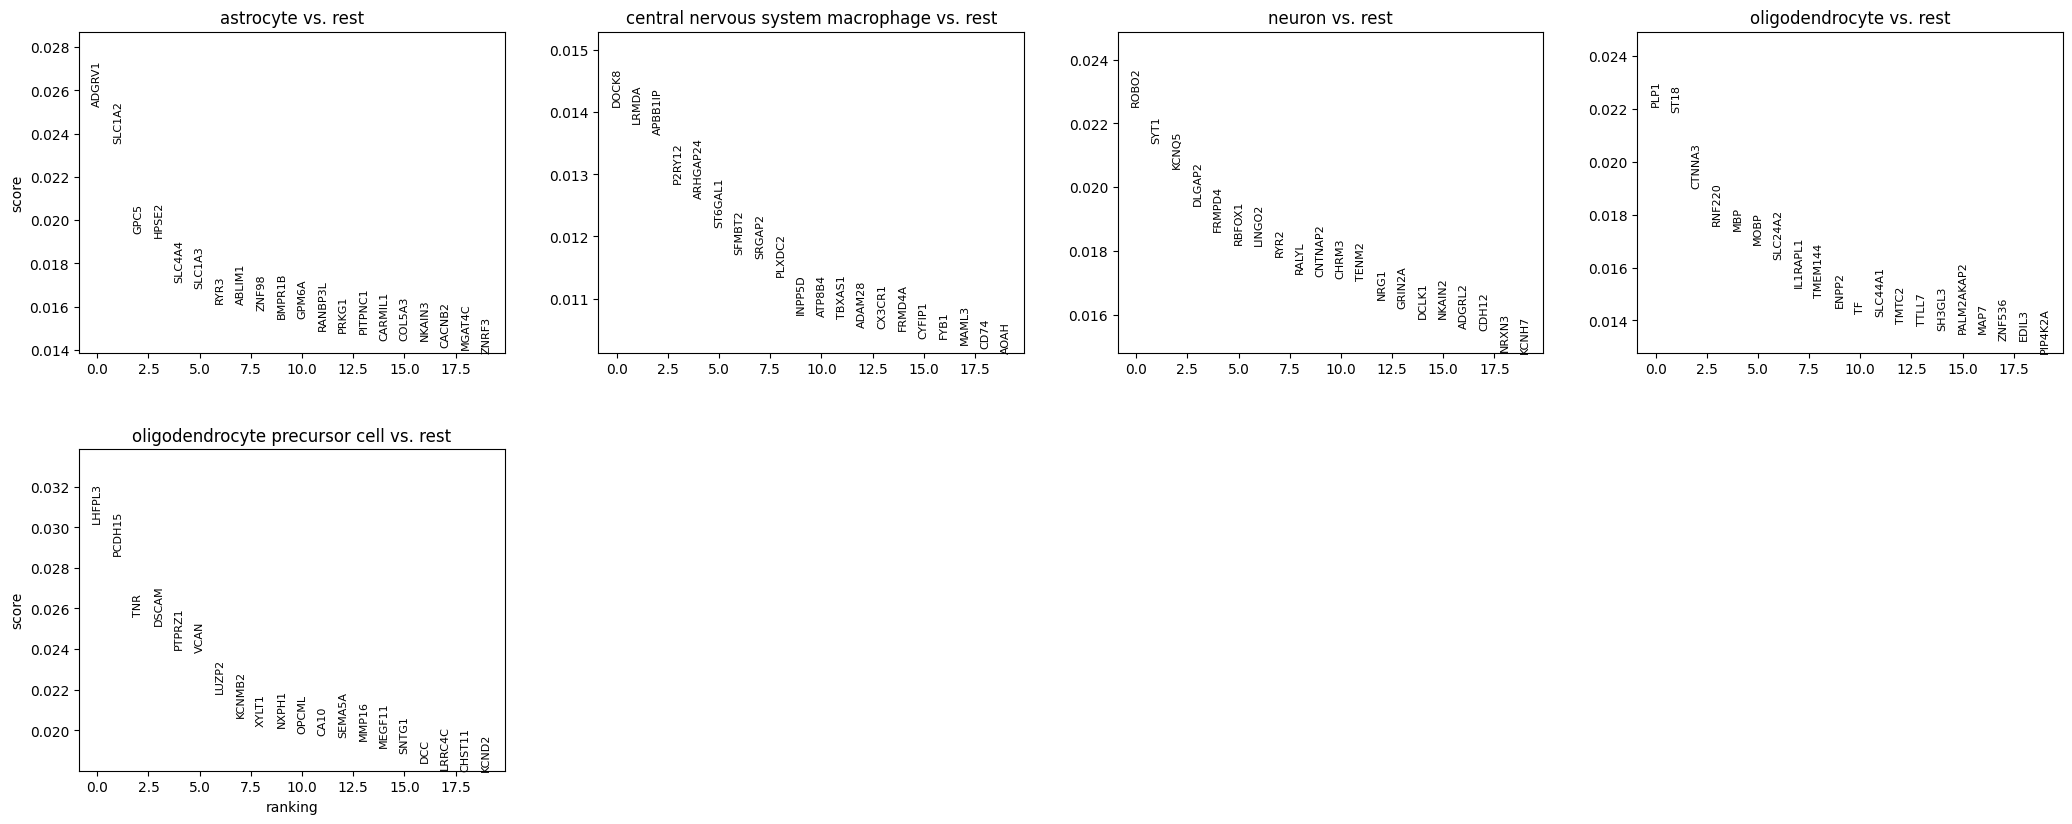

In [64]:
sc.tl.rank_genes_groups(adata_pb, 'cell_type', method='logreg', reference='rest', key_added="logreg", pts=True)
sc.pl.rank_genes_groups(adata_pb, n_genes=20, sharey=False, key="logreg")

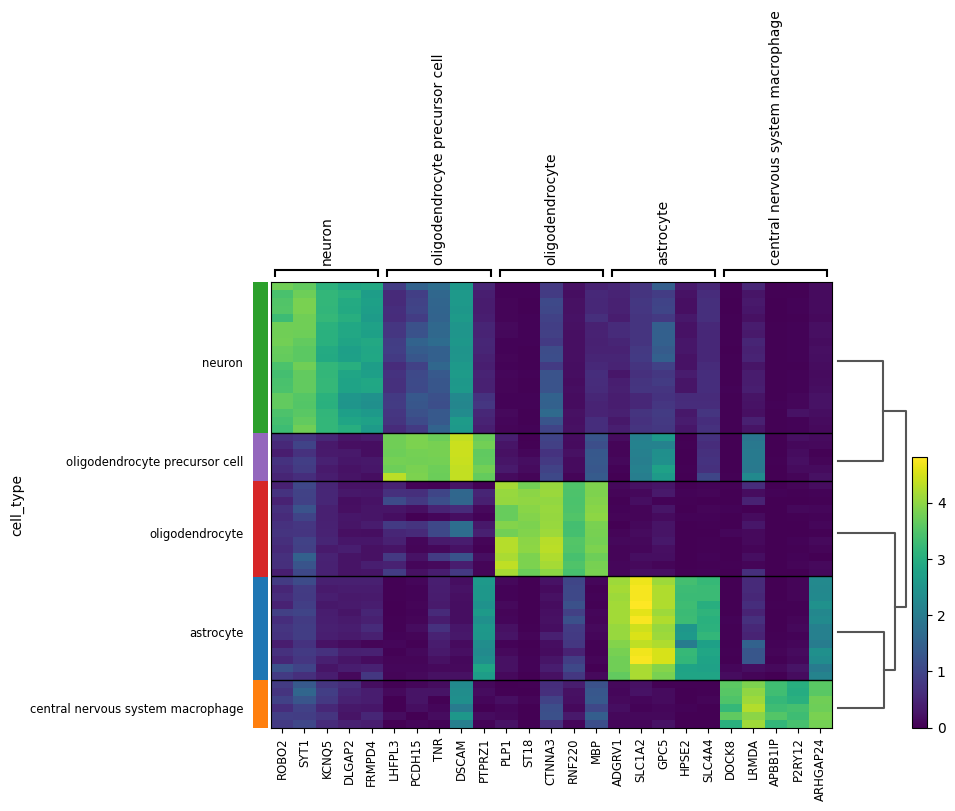

In [65]:
sc.pl.rank_genes_groups_heatmap(adata_pb, n_genes=5, key="logreg", groupby="cell_type", show_gene_labels=True)

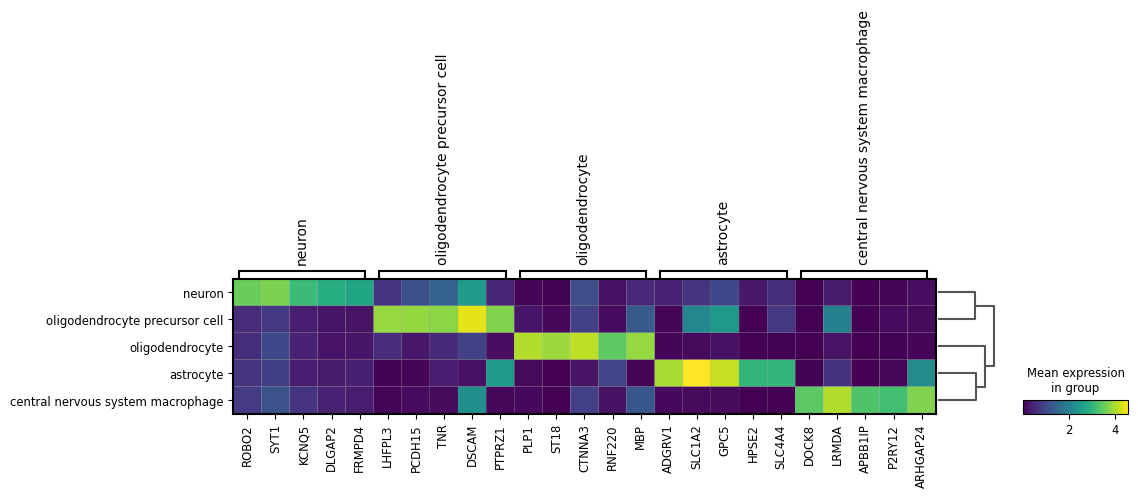

In [66]:
sc.pl.rank_genes_groups_matrixplot(adata_pb, n_genes=5, key="logreg", groupby="cell_type")

### Save results

In [67]:
adata_pb.write_h5ad("results/pb_adata_diffexpr.h5ad")

: 